## Task 1: A classification example: fetal heart condition diagnosis
***
## Group Members:
### Nils Dunlop, e-mail: gusdunlni@student.gu.se
### Francisco Alejandro Erazo Piza, e-mail: guserafr@student.gu.se
### Chukwudumebi Ubogu, e-mail: gusuboch@student.gu.se

### Step 1. Reading the data

In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the CSV file.
data = pd.read_csv('CTG.csv', skiprows=1)

# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [150]:
# Print the first few rows
X.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
658,130.0,1.0,0.0,3.0,0.0,0.0,0.0,24.0,1.2,12.0,...,35.0,120.0,155.0,1.0,0.0,134.0,133.0,135.0,1.0,0.0
1734,134.0,9.0,1.0,8.0,5.0,0.0,0.0,59.0,1.2,0.0,...,109.0,80.0,189.0,6.0,0.0,150.0,146.0,150.0,33.0,0.0
1226,125.0,1.0,0.0,4.0,0.0,0.0,0.0,43.0,0.7,31.0,...,21.0,120.0,141.0,0.0,0.0,131.0,130.0,132.0,1.0,0.0
1808,143.0,0.0,0.0,1.0,0.0,0.0,0.0,69.0,0.3,6.0,...,27.0,132.0,159.0,1.0,0.0,145.0,144.0,146.0,1.0,0.0
825,152.0,0.0,0.0,4.0,0.0,0.0,0.0,62.0,0.4,59.0,...,25.0,136.0,161.0,0.0,0.0,159.0,156.0,158.0,1.0,1.0


In [151]:
# Print the shape of the input and output data.
X.shape

(2126, 21)

In [152]:
Y.value_counts()

normal        1655
suspect        295
pathologic     176
Name: NSP, dtype: int64

### Step 2. Training the baseline classifier

In [153]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='most_frequent')

In [154]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, Xtrain, Ytrain)

print("DummyClassifier Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

DummyClassifier Accuracy: 0.78 (+/- 0.00)


### Step 3. Trying out some different classifiers

In [155]:
# Tree-based classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Evaluate the performance of a classifier using cross-validation.
def evaluate_tree_classifiers(Xtrain, Ytrain):
    # Define a list of classifiers
    classifiers = [
        ("DecisionTreeClassifier", DecisionTreeClassifier()),
        ("RandomForestClassifier", RandomForestClassifier()),
        ("GradientBoostingClassifier", GradientBoostingClassifier())
    ]

    # Iterate over classifiers and perform cross-validation
    for name, clf in classifiers:
        scores = cross_val_score(clf, Xtrain, Ytrain)
        print(f"{name} Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

evaluate_tree_classifiers(Xtrain, Ytrain)

DecisionTreeClassifier Accuracy: 0.92 (+/- 0.03)
RandomForestClassifier Accuracy: 0.94 (+/- 0.02)
GradientBoostingClassifier Accuracy: 0.95 (+/- 0.02)


In [156]:
# Linear classifiers: Perceptron
from sklearn.linear_model import Perceptron

clf = Perceptron()
scores = cross_val_score(clf, Xtrain, Ytrain)
print("Perceptron Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Perceptron Accuracy: 0.83 (+/- 0.12)


In [157]:
# Linear classifiers: Logistic Regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='newton-cg')
scores = cross_val_score(clf, Xtrain, Ytrain)
print("LogisticRegression Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

LogisticRegression Accuracy: 0.89 (+/- 0.02)


In [158]:
# Lineear classifiers: LinearSVC
from sklearn.svm import LinearSVC

clf = LinearSVC(dual=False)
scores = cross_val_score(clf, Xtrain, Ytrain)
print("LinearSVC Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

LinearSVC Accuracy: 0.90 (+/- 0.03)


In [159]:
# Neural Network Classifier
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()
scores = cross_val_score(clf, Xtrain, Ytrain)
print("MLPClassifier Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

MLPClassifier Accuracy: 0.87 (+/- 0.03)


### Step 4. Final evaluation

In [160]:
from sklearn.metrics import accuracy_score
# Train the classifier on the training set.
clf = GradientBoostingClassifier()
clf.fit(Xtrain, Ytrain)
Yguess = clf.predict(Xtest)
print("GradientBoostingClassifier Accuracy: %0.2f" % accuracy_score(Ytest, Yguess))

GradientBoostingClassifier Accuracy: 0.93


## Task 2: Decision trees for classification

In [161]:
# Lecture 1 Code

from collections import Counter
from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin
from abc import ABC, abstractmethod
import numpy as np
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

def majority_sum_scorer(n_low, low_distr, n_high, high_distr):
    maj_sum_low = low_distr.most_common(1)[0][1]
    maj_sum_high = high_distr.most_common(1)[0][1]
    return maj_sum_low + maj_sum_high

def entropy(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return -sum(p*np.log2(p) if p > 0 else 0 for p in ps)

def info_gain_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*entropy(low_distr)+n_high*entropy(high_distr))/(n_low+n_high)

def gini_impurity(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return 1-sum(p**2 for p in ps)

def gini_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*gini_impurity(low_distr)+n_high*gini_impurity(high_distr))/(n_low+n_high)

class DecisionTreeLeaf:

    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        graph.node(node_id, val_str, style='filled')
        return node_counter+1, node_id

    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False

class DecisionTreeBranch:

    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then 
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id

class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth

    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        Y = np.array(Y)
        self.root = self.make_tree(X, Y, self.max_depth)

    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph

    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)

        # This is the recursive training 
    def make_tree(self, X, Y, max_depth):

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be the most common value in Y.
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        _, best_feature, best_threshold = max(self.best_split(X, Y, feature) for feature in range(n_features))

        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)

    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]

    # The following three methods need to be implemented by the classification and regression subclasses.

    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass

class TreeClassifier(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth=10, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion

    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Counter(Y)
        return self.class_distribution.most_common(1)[0][0]

    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return len(self.class_distribution) == 1

    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = Counter()
        high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]

            # Update the frequency tables.
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point

### Results without hyperparameter tuning

In [162]:
clf = TreeClassifier()
scores = cross_val_score(clf, Xtrain, Ytrain)
print("TreeClassifier Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

TreeClassifier Accuracy: 0.91 (+/- 0.03)


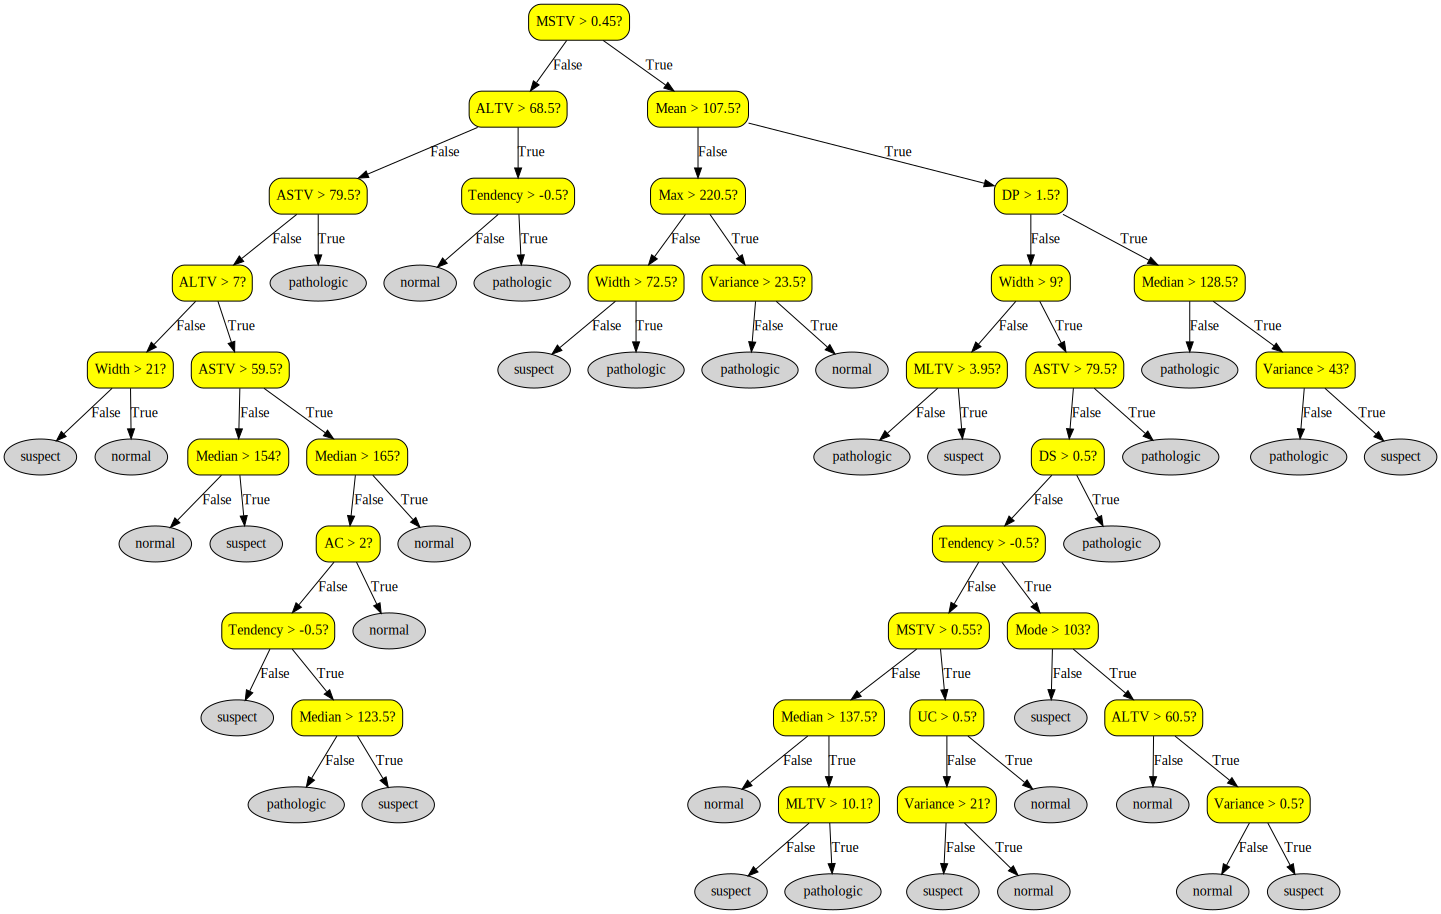

In [163]:
clf.fit(Xtrain, Ytrain)
clf.draw_tree()

### Adding hyperparameter tuning

In [164]:
# Testing different values for max_depth
max_depth_range = range(1, 20)

# Dictionary to store the average cross-validation scores for each depth
cv_scores = {}

# Perform cross-validation for each value of max_depth
for depth in max_depth_range:
    tree_clf = TreeClassifier(max_depth=depth)
    # Using StratifiedKFold for balanced splits
    strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    scores = cross_val_score(tree_clf, Xtrain, Ytrain, cv=strat_k_fold, scoring='accuracy')
    cv_scores[depth] = scores.mean()

# Find the depth with the highest average score
best_depth = max(cv_scores, key=cv_scores.get)
print(f"Best max_depth: {best_depth} with average CV score: {cv_scores[best_depth]}")

Best max_depth: 5 with average CV score: 0.9152941176470588


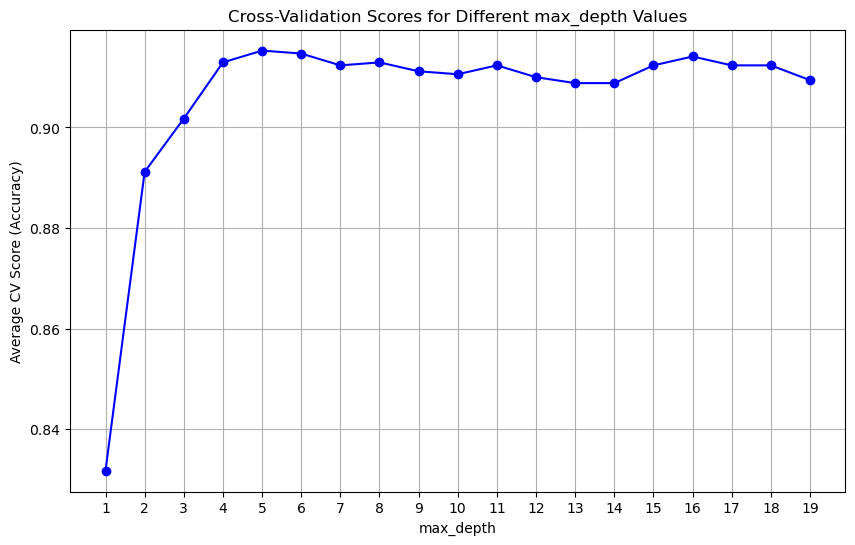

In [165]:
# Create a plot of max_depth values against their corresponding cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(list(max_depth_range), list(cv_scores.values()), marker='o', linestyle='-', color='b')
plt.title("Cross-Validation Scores for Different max_depth Values")
plt.xlabel("max_depth")
plt.ylabel("Average CV Score (Accuracy)")
plt.xticks(list(max_depth_range))
plt.grid(True)
plt.show()

Test set accuracy: 0.8896713615023474


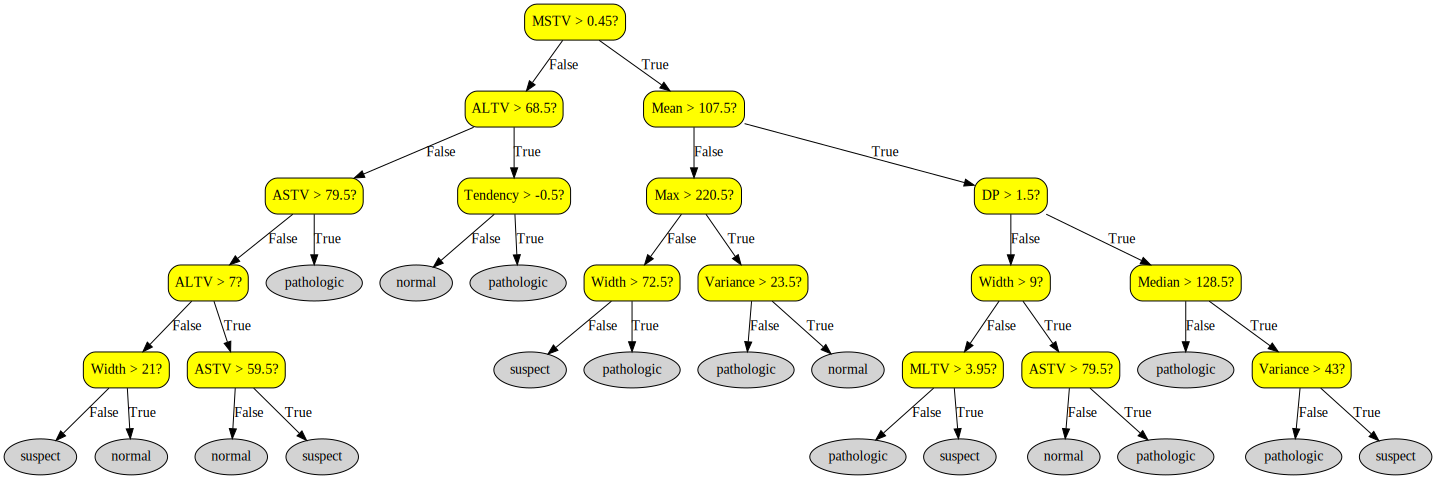

In [166]:
# Initialize the classifier with the best max_depth
best_tree_clf = TreeClassifier(max_depth=best_depth)

# Train on the entire training set
best_tree_clf.fit(Xtrain, Ytrain)

# Predict on the test set
Ypred = best_tree_clf.predict(Xtest)

# Evaluate the performance
test_accuracy = accuracy_score(Ytest, Ypred)
print(f"Test set accuracy: {test_accuracy}")

# Draw the tree
best_tree_clf.draw_tree()

## Task 3: A regression example: predicting apartment prices

In [167]:
# Import libraries
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Read the CSV file using Pandas.
alldata = pd.read_csv('sberbank.csv')

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 7 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

### Note:
We noticed that the values num_room and kitch_sq only consisted of NaN values. Therefore, we decided to exclude these columns so we did not drop all the rows containing NaN values. Resulting in an empty dataframe.

In [168]:
def evaluate_model(model, X, y):
    scores = cross_validate(model, X, y, scoring='neg_mean_squared_error')
    mean_score = scores['test_score'].mean()
    std_score = scores['test_score'].std() * 2  # 95% confidence interval
    print(f"{model.__class__.__name__} Accuracy: {mean_score:.2f} (+/- {std_score:.2f})")

In [171]:
# Evaluate each model
evaluate_model(DummyRegressor(), Xtrain, Ytrain)
evaluate_model(LinearRegression(), Xtrain, Ytrain)
evaluate_model(Ridge(), Xtrain, Ytrain)
evaluate_model(Lasso(), Xtrain, Ytrain)
evaluate_model(DecisionTreeRegressor(), Xtrain, Ytrain)
evaluate_model(RandomForestRegressor(), Xtrain, Ytrain)
evaluate_model(GradientBoostingRegressor(), Xtrain, Ytrain)

# Create a pipeline that limits the number of iterations for the MLPRegressor
mlp_model = make_pipeline(StandardScaler(), MLPRegressor(max_iter=200))
evaluate_model(MLPRegressor(), Xtrain, Ytrain)

DummyRegressor Accuracy: -0.56 (+/- 0.16)
LinearRegression Accuracy: -0.53 (+/- 0.24)
Ridge Accuracy: -0.53 (+/- 0.24)
Lasso Accuracy: -0.53 (+/- 0.20)
DecisionTreeRegressor Accuracy: -0.97 (+/- 0.19)
RandomForestRegressor Accuracy: -0.55 (+/- 0.15)
GradientBoostingRegressor Accuracy: -0.52 (+/- 0.15)
MLPRegressor Accuracy: -39.33 (+/- 56.16)


In [170]:
# Initialize the GradientBoostingRegressor
regr = GradientBoostingRegressor()

# Fit the model to the training data
regr.fit(Xtrain, Ytrain)

# Predict on the test set
Ypred = regr.predict(Xtest)

# Calculate the mean squared error on the test set
mse = mean_squared_error(Ytest, Ypred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.510194572520033
